In [41]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math

In [2]:
df_sub = pd.read_pickle('subscribers')
df_conser = pd.read_pickle('customer_service_reps')
df_eng = pd.read_pickle('engagement')
df_channel = pd.read_csv("channel_spend_graduate1.csv")
# df_channel = pd.read_csv('advertising_spend_data.xlsx')

In [3]:
df_sub.reset_index(inplace = True)
df_sub.drop(['index'],axis = 1,inplace = True)

df_conser.reset_index(inplace = True)
df_conser.drop(['index'],axis = 1,inplace = True)

df_eng.reset_index(inplace = True)
df_eng.drop(['index'],axis = 1,inplace = True)

In [4]:
df_sub.loc[df_sub['attribution_technical'] == 'brand sem intent google', 'attribution_technical'] = 'brand_sem_intent_google'

In [5]:
df_channel['date'] =  df_channel['date'].apply(lambda x: x[0:4] + x[5:7])

In [6]:
df_channel

,channel,date,spend_AED
0,facebook,201906,84800
1,facebook,201907,60000
2,facebook,201908,52300
3,facebook,201909,49000
4,facebook,201910,51300
...,...,...,...
75,referral,201911,7300
76,referral,201912,8000
77,referral,202001,7400
78,referral,202002,6500


# Overview

In [233]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribution_t

In [234]:
df_sub['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand_sem_intent_google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [148]:
df_sub_churn_overview = df_sub_churn.dropna(subset = ['current_sub_TF'])

In [150]:
df_sub_churn_overview['current_sub_TF'].value_counts()

False    102695
True      32355
Name: current_sub_TF, dtype: int64

# Q2

In [202]:
df_sub_q2 = df_sub.copy(deep=True)

In [203]:
feature_list = ['package_type','preferred_genre','intended_use','age','male_TF']

In [204]:
df_sub_q2 = df_sub_q2[-(df_sub_q2.age > 100)]

In [205]:
df_sub_q2 = df_sub_q2.dropna(subset = feature_list )

In [206]:
df_sub_q2

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
5,24810928,base,NaN,comedy,access to exclusive content,20.051667,NaN,False,70.0,False,...,71.0,True,2020-03-18,False,0.0000,0.3303,ar,True,True,RAKBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,11.0,False,2020-01-16,False,0.0000,0.0000,ar,False,False,NaN
227623,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
227624,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
227625,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN


In [207]:
df_seg = df_sub_q2[feature_list]

In [208]:
df_seg.head()

,package_type,preferred_genre,intended_use,age,male_TF
1,base,comedy,access to exclusive content,70.0,False
2,enhanced,regional,replace OTT,25.0,True
3,base,drama,replace OTT,30.0,False
4,base,comedy,replace OTT,28.0,False
5,base,comedy,access to exclusive content,70.0,False


In [209]:
df_seg['age'] = df_seg['age']/(max(df_seg['age'])-min(df_seg['age']))

<ipython-input-209-2314aa721b17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['age'] = df_seg['age']/(max(df_seg['age'])-min(df_seg['age']))


In [210]:
df_seg['male_TF'] = df_seg['male_TF'].astype('string')

<ipython-input-210-7d544572e9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['male_TF'] = df_seg['male_TF'].astype('string')


In [211]:
df_seg['male_TF'] = df_seg['male_TF'].map(
                   {"True":1 ,"False":0})

<ipython-input-211-817d45927fc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seg['male_TF'] = df_seg['male_TF'].map(


In [212]:
df_seg.head()

,package_type,preferred_genre,intended_use,age,male_TF
1,base,comedy,access to exclusive content,0.70,0
2,enhanced,regional,replace OTT,0.25,1
3,base,drama,replace OTT,0.30,0
4,base,comedy,replace OTT,0.28,0
5,base,comedy,access to exclusive content,0.70,0


In [213]:
package_type_dummy=pd.get_dummies(df_seg['package_type'])
df_seg=pd.merge(df_seg,package_type_dummy,left_index=True,right_index=True)

preferred_genre_dummy=pd.get_dummies(df_seg['preferred_genre'])
df_seg=pd.merge(df_seg,preferred_genre_dummy,left_index=True,right_index=True)

intended_use_dummy=pd.get_dummies(df_seg['intended_use'])
df_seg=pd.merge(df_seg,intended_use_dummy,left_index=True,right_index=True)

In [214]:
df_seg = df_seg.drop(['package_type','preferred_genre','intended_use'],axis = 1)

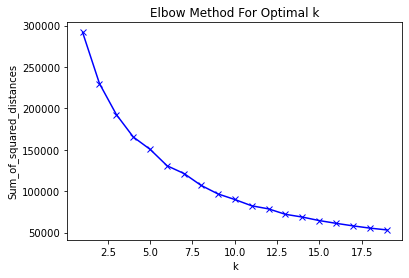

In [215]:
def fitting(df):
    Sum_of_squared_distances = []
    K = range(1,20)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        #inertia_ reports the within group sum of squared errors, which is W in this Jupyter.
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    return 

fitting(df_seg)

In [216]:
X = df_seg

kmeans = KMeans(n_clusters=5)
res = kmeans.fit(X)

y = res.predict(X)
y = y.tolist()
df_sub_q2['group'] = y

In [217]:
for i in range(5):
    df_num = i + 1
    locals()['df_group'+str(df_num)] = df_sub_q2[df_sub_q2['group'] == i]

In [192]:
# age distribution for each group

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

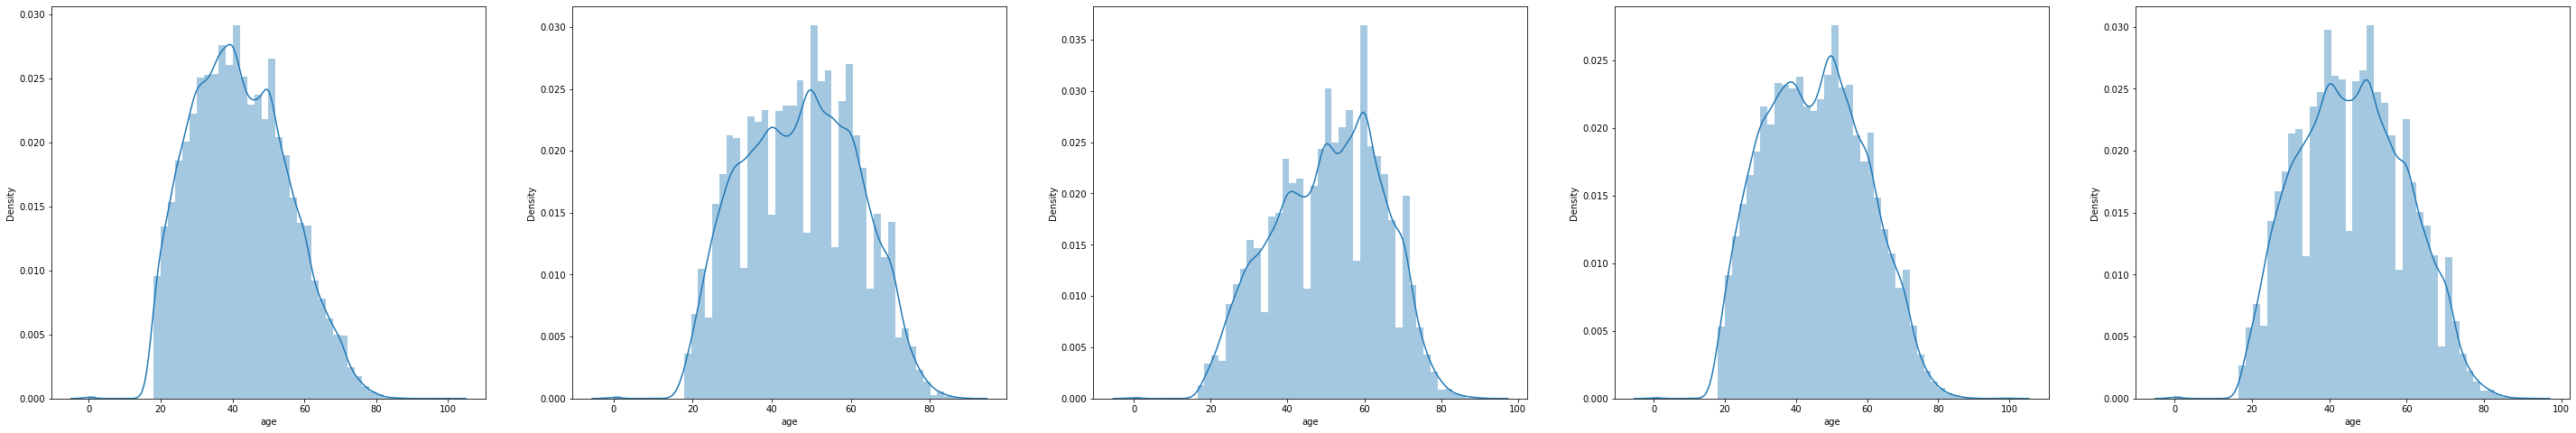

In [218]:
plt.figure(figsize=(50,8))

plt.subplot(1,5,1)
sns.distplot(df_group1['age'])
#plt.show()

plt.subplot(1,5,2)
sns.distplot(df_group2['age'])
#plt.show()

plt.subplot(1,5,3)
sns.distplot(df_group3['age'])
#plt.show()

plt.subplot(1,5,4)
sns.distplot(df_group4['age'])
#plt.show()

plt.subplot(1,5,5)
sns.distplot(df_group5['age'])
plt.show()

In [228]:
# male_TF
gender_list = list(set(df_sub_q2['male_TF']))
dict_gender = defaultdict(list)
dict_gender['gender'] = gender_list
for i in range(5):
    df_num = i + 1
    num_list = list()
    for gender in gender_list:
        #print(genre)
        num_list.append((locals()['df_group'+str(df_num)]['male_TF'] == gender).sum())
    dict_gender['group'+str(df_num)] = num_list
df_gender =pd.DataFrame.from_dict(dict_gender)

In [229]:
df_gender

,gender,group1,group2,group3,group4,group5
0,False,28215,26168,24543,21425,33420
1,True,4650,3557,4925,3902,4329


In [240]:
df_group1['age'].sum()/df_group1.shape[0]

41.84494246233995

In [241]:
df_group2['age'].sum()/df_group2.shape[0]

47.1323264422704

In [242]:
df_group3['age'].sum()/df_group3.shape[0]

50.4976628691916

In [243]:
df_group4['age'].sum()/df_group4.shape[0]

45.24714086848173

In [244]:
df_group5['age'].sum()/df_group5.shape[0]

45.983990544355684

In [220]:
# preferred_genre
genre_list = list(set(df_sub_q2['preferred_genre']))
dict_genre = defaultdict(list)
dict_genre['genre'] = genre_list
for i in range(5):
    df_num = i + 1
    num_list = list()
    for genre in genre_list:
        #print(genre)
        num_list.append((locals()['df_group'+str(df_num)]['preferred_genre'] == genre).sum())
    dict_genre['group'+str(df_num)] = num_list
df_genre =pd.DataFrame.from_dict(dict_genre)

In [221]:
df_genre

,genre,group1,group2,group3,group4,group5
0,other,798,899,0,602,1470
1,international,1043,1727,0,1053,2223
2,drama,6174,0,29468,4214,0
3,comedy,22470,25316,0,17951,31324
4,regional,2380,1783,0,1507,2732


In [222]:
# package_type
package_list = list(set(df_sub_q2['package_type']))
dict_package = defaultdict(list)
dict_package['package'] = package_list
for i in range(5):
    df_num = i + 1
    num_list = list()
    for package in package_list:
        #print(package)
        num_list.append((locals()['df_group'+str(df_num)]['package_type'] == package).sum())
    dict_package['group'+str(df_num)] = num_list
df_package =pd.DataFrame.from_dict(dict_package)

In [223]:
df_package

,package,group1,group2,group3,group4,group5
0,economy,0,0,5700,5120,5023
1,enhanced,32865,0,0,20207,0
2,base,0,29725,23768,0,32726


In [224]:
# intended use
use_list = list(set(df_sub_q2['intended_use']))
dict_use = defaultdict(list)
dict_use['use'] = use_list
for i in range(5):
    df_num = i + 1
    num_list = list()
    for use in use_list:
        #print(package)
        num_list.append((locals()['df_group'+str(df_num)]['intended_use'] == use).sum())
    dict_use['group'+str(df_num)] = num_list
df_use =pd.DataFrame.from_dict(dict_use)

In [225]:
df_use

,use,group1,group2,group3,group4,group5
0,education,17,0,9,0,28
1,expand international access,41,0,23,0,81
2,supplement OTT,8502,0,3720,0,11011
3,replace OTT,22577,0,9811,0,23893
4,other,1684,0,1205,0,2649
5,access to exclusive content,0,29725,14676,25327,0
6,expand regional access,44,0,24,0,87


# Q3

In [226]:
df_sub_q3 = df_sub.copy(deep=True)
df_channel_q3 = df_channel.copy(deep=True)

In [227]:
df_sub_q3['account_creation_date'] = df_sub_q3['account_creation_date'].astype('string')

In [154]:
df_sub_q3['account_creation_date'] = df_sub_q3['account_creation_date'].apply(lambda x: x[0:4]+x[5:7])

In [155]:
df_sub_q3['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand_sem_intent_google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
content_gr

In [156]:
df_channel_q3['date'] = df_channel_q3['date'].astype('string')

In [157]:
df_channel_q3.head()

,channel,date,spend_AED
0,facebook,201906,84800
1,facebook,201907,60000
2,facebook,201908,52300
3,facebook,201909,49000
4,facebook,201910,51300


In [158]:
df_channel_q3 = df_channel_q3[df_channel_q3['date'] != '201906']
df_channel_q3.reset_index(inplace = True)
df_channel_q3.drop(['index'],axis = 1,inplace = True)

In [159]:
df_channel_q3['convert'] = 0
for i in range(df_channel_q3.shape[0]):
    for j in range(df_sub_q3.shape[0]):
        # print((df_channel_q3.loc[i,'date'] == df_sub_q3.loc[j,'account_creation_date']))
        if (df_channel_q3.loc[i,'channel'] == df_sub_q3.loc[j,'attribution_technical']) and (df_channel_q3.loc[i,'date'] == df_sub_q3.loc[j,'account_creation_date']):
        #if (df_channel_q3.loc[i,'channel'] == df_sub_q3.loc[j,'attribution_technical']) and (df_channel_q3.loc[i,'date'] == df_sub_q3.loc[j,'account_creation_date']):
            df_channel_q3.loc[i,'convert'] = df_channel_q3.loc[i,'convert']+1
    # print(i)

In [160]:
channel_list = set(df_channel_q3['channel'])

In [161]:
channel_list

{'affiliate',
 'brand_sem_intent_google',
 'email',
 'email_blast',
 'facebook',
 'pinterest',
 'referral',
 'search'}

In [162]:
for channel in channel_list:
    spend_list = df_channel_q3[df_channel_q3['channel'] == channel]['spend_AED']
    convert_list = df_channel_q3[df_channel_q3['channel'] == channel]['convert']
    
    locals()['df_' + channel] = pd.DataFrame([spend_list,convert_list]).T
    locals()['df_' + channel].sort_values('spend_AED', inplace = True)
    locals()['df_' + channel].reset_index(inplace = True)
    locals()['df_' + channel].drop(['index'],axis = 1,inplace = True)
    
    for i in range(locals()['df_' + channel].shape[0]):
        if i == 0:
            locals()['df_' + channel].loc[i,'marginal_cac'] = locals()['df_' + channel].loc[i,'spend_AED']/locals()['df_' + channel].loc[i,'convert']
        else:
            locals()['df_' + channel].loc[i,'marginal_cac'] = \
            (locals()['df_' + channel].loc[i,'spend_AED']-locals()['df_' + channel].loc[i-1,'spend_AED'])/\
            (locals()['df_' + channel].loc[i,'convert']-locals()['df_' + channel].loc[i-1,'convert'])

In [163]:
df_affiliate

,spend_AED,convert,marginal_cac
0,11700,509,22.986248
1,12000,839,0.909091
2,12100,565,-0.364964
3,12200,760,0.512821
4,14300,1074,6.687898
5,15000,1480,1.724138
6,16300,1903,3.073286
7,16400,1065,-0.119332
8,17600,1621,2.158273


In [164]:
df_brand_sem_intent_google

,spend_AED,convert,marginal_cac
0,21200,1765,12.011331
1,21300,2090,0.307692
2,21300,1895,-0.000000
3,21300,1530,-0.000000
4,21400,1602,1.388889
5,21600,2030,0.467290
6,21700,2346,0.316456
7,22200,2443,5.154639
8,22700,2626,2.732240


In [165]:
df_email

,spend_AED,convert,marginal_cac
0,75500,2368,31.883446
1,75600,3260,0.112108
2,75800,2420,-0.238095
3,75900,2584,0.609756
4,76000,2305,-0.358423
5,76100,3092,0.127065
6,76100,2677,-0.000000
7,76600,3168,1.018330
8,78000,3507,4.129794


In [166]:
df_email_blast

,spend_AED,convert,marginal_cac
0,300,35,8.571429
1,300,66,0.000000
2,300,56,-0.000000
3,3500,411,9.014085
4,9800,629,28.899083
5,29800,1510,22.701476
6,32300,977,-4.690432
7,65900,1902,36.324324
8,73700,1582,-24.375000


In [167]:
df_facebook

,spend_AED,convert,marginal_cac
0,49000,6129,7.994779
1,49000,6289,0.000000
2,49100,6889,0.166667
3,49700,7988,0.545951
4,51300,9489,1.065956
5,51400,9288,-0.497512
6,52300,9855,1.587302
7,56100,12995,1.210191
8,60000,10011,-1.306971


In [168]:
df_pinterest

,spend_AED,convert,marginal_cac
0,5900,455,12.967033
1,6000,793,0.295858
2,6000,517,-0.000000
3,6200,637,1.666667
4,6300,594,-2.325581
5,6400,680,1.162791
6,6700,682,150.000000
7,6700,819,0.000000
8,7200,851,15.625000


In [169]:
df_referral

,spend_AED,convert,marginal_cac
0,6500,583,11.149228
1,6600,528,-1.818182
2,6800,521,-28.571429
3,7300,529,62.500000
4,7300,587,0.000000
5,7400,582,-20.000000
6,7400,584,0.000000
7,8000,666,7.317073
8,10000,568,-20.408163


In [170]:
df_search

,spend_AED,convert,marginal_cac
0,17300,1328,13.027108
1,18100,1939,1.309329
2,18900,1852,-9.195402
3,21000,2333,4.365904
4,21400,2510,2.259887
5,22700,3093,2.229846
6,30100,4300,6.130903
7,32100,3770,-3.773585
8,33600,4073,4.950495


In [171]:
cac_list = []
for channel in channel_list:
    data = list()
    data.append(channel)
    data.append(df_channel_q3[df_channel_q3['channel'] == channel]['spend_AED'].sum())
    data.append(df_channel_q3[df_channel_q3['channel'] == channel]['convert'].sum())
    data.append((df_channel_q3[df_channel_q3['channel'] == channel]['spend_AED'].sum())/(df_channel_q3[df_channel_q3['channel'] == channel]['convert'].sum()))
    cac_list.append(data)
average_cac = pd.DataFrame(cac_list)
average_cac.rename(columns = {0:'channel',1:'spend',2:'convert',3:'average_cac'},inplace = True)

In [172]:
average_cac

,channel,spend,convert,average_cac
0,brand_sem_intent_google,194700,18327,10.623670
1,email_blast,215900,7168,30.119978
2,referral,67300,5148,13.073038
3,pinterest,57400,6028,9.522230
4,email,685600,25381,27.012332
5,facebook,467900,78933,5.927812
6,affiliate,127600,9816,12.999185
7,search,215200,25198,8.540360


In [189]:
df_sub_q3['attribution_technical'] = df_sub_q3['attribution_technical'].astype('string')

In [186]:
channel_list

{'affiliate',
 'brand_sem_intent_google',
 'email',
 'email_blast',
 'facebook',
 'pinterest',
 'referral',
 'search'}

In [200]:
clv_list = []
for channel in channel_list:
    data = list()
    data.append(channel)
    
    spend = df_channel_q3[df_channel_q3['channel'] == channel]['spend_AED'].sum()
    data.append(spend)
    
    convert = df_channel_q3[df_channel_q3['channel'] == channel]['convert'].sum()
    data.append(convert)
    
    locals()['df_clv_' + channel] = df_sub_q3[df_sub_q3['attribution_technical'] == channel]
    revenue = locals()['df_clv_' + channel]['discount_price'].sum() + locals()['df_clv_' + channel]['revenue_net'].sum() + locals()['df_clv_' + channel]['join_fee'].sum()
    
    clv = (revenue - spend)/convert
    data.append(clv)
    
    cac = (df_channel_q3[df_channel_q3['channel'] == channel]['spend_AED'].sum())/(df_channel_q3[df_channel_q3['channel'] == channel]['convert'].sum())
    data.append(clv/cac)
    
    clv_list.append(data)
clv = pd.DataFrame(clv_list)
clv.rename(columns = {0:'channel',1:'spend',2:'convert',3:'clv',4:'clv/cac'},inplace = True)

In [201]:
clv

,channel,spend,convert,clv,clv/cac
0,brand_sem_intent_google,194700,18327,-4.186844,-0.394105
1,email_blast,215900,7168,-23.633678,-0.784651
2,referral,67300,5148,-6.831942,-0.522598
3,pinterest,57400,6028,-3.339211,-0.350675
4,email,685600,25381,-21.057221,-0.779541
5,facebook,467900,78933,-0.349415,-0.058945
6,affiliate,127600,9816,-6.965482,-0.535840
7,search,215200,25198,-2.698180,-0.315933


In [199]:
average_cac

,channel,spend,convert,average_cac
0,brand_sem_intent_google,194700,18327,10.623670
1,email_blast,215900,7168,30.119978
2,referral,67300,5148,13.073038
3,pinterest,57400,6028,9.522230
4,email,685600,25381,27.012332
5,facebook,467900,78933,5.927812
6,affiliate,127600,9816,12.999185
7,search,215200,25198,8.540360


# Churn Model

In [7]:
df_conser_churn = df_conser.copy(deep=True)
df_eng_churn = df_eng.copy(deep=True)
df_sub_churn = df_sub.copy(deep=True)

In [8]:
user_list = set(df_conser['subid'])

In [9]:
df_current = df_conser.drop_duplicates('subid')

In [10]:
df_current.index = df_current['subid']

In [11]:
df_num_period = pd.DataFrame(df_eng_churn.groupby('subid')['payment_period'].max() + 1)

In [12]:
df_eng_churn = df_eng_churn.groupby('subid').sum()
df_eng_churn.drop(['payment_period'],axis =1,inplace =True)

In [13]:
df_eng_churn = pd.concat([df_eng_churn, df_num_period], axis = 1)

In [14]:
eng_fea_list = ['app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']
for feature in eng_fea_list:
    df_eng_churn[feature] = df_eng_churn[feature]/df_eng_churn['payment_period']

In [15]:
from time import sleep
from tqdm import tqdm

for i in tqdm(range(df_sub_churn.shape[0])):
    try:
        user_id = df_sub_churn.loc[i,'subid']
        df_sub_churn.loc[i,'current_sub_TF'] = df_current.loc[user_id,'current_sub_TF']
        for feature in eng_fea_list:
            df_sub_churn.loc[i,feature] = df_eng_churn.loc[user_id,feature]
    except: 
        continue
    sleep(0.01)
sleep(0.5)

100%|██████████| 227628/227628 [1:03:44<00:00, 59.52it/s] 


In [17]:
df_sub_churn.to_csv('df_sub_churn.csv', index = False)

In [20]:
df_sub_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   subid                            227628 non-null  int64         
 1   package_type                     192054 non-null  object        
 2   num_weekly_services_utilized     117178 non-null  float64       
 3   preferred_genre                  191302 non-null  object        
 4   intended_use                     224079 non-null  object        
 5   weekly_consumption_hour          189698 non-null  float64       
 6   num_ideal_streaming_services     115458 non-null  float64       
 7   retarget_TF                      227628 non-null  bool          
 8   age                              192459 non-null  float64       
 9   male_TF                          227359 non-null  object        
 10  country                          227628 non-

In [95]:
df_sub_churn['discount_price'].value_counts()

4.5141    227096
5.0279       325
1.0276       167
4.2205        18
4.0737        12
4.3673         4
4.4407         2
3.7801         2
1.1744         1
0.7707         1
Name: discount_price, dtype: int64

In [24]:
feature_churn = ['age','male_TF','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','app_opens','num_videos_completed','cust_service_mssgs','num_videos_more_than_30_seconds','num_videos_rated','num_series_started','current_sub_TF']


In [76]:
df_churn = df_sub_churn[feature_churn]

In [77]:
df_churn = df_churn.dropna()

In [78]:
df_churn = df_churn[-(df_churn.age > 100)]

In [79]:
df_churn['male_TF'] = df_churn['male_TF'].astype('string')
df_churn['male_TF'] = df_churn['male_TF'].map(
                   {"True":1 ,"False":0})

In [80]:
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].astype('string')
df_churn['current_sub_TF'] = df_churn['current_sub_TF'].map(
                   {"True":0 ,"False":1})
df_churn = df_churn.rename(columns = {'current_sub_TF':'churn_TF'})

In [81]:
df_churn.head()

,age,male_TF,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
2,25.0,1,3.362885,36.001186,1.951776,2.0,13.0,2.0,13.0,0.0,1.0,1
6,61.0,0,2.049135,20.051667,1.860289,20.0,91.0,8.5,91.0,3.0,19.5,0
7,23.0,0,3.002048,34.551230,1.870503,52.0,42.0,5.0,103.0,0.0,14.5,0
12,57.0,0,2.452687,28.751405,1.842940,12.0,18.0,4.0,22.0,0.0,3.0,1
13,54.0,0,2.876856,33.101274,1.867353,71.0,52.0,6.0,68.0,0.0,12.0,1


In [82]:
# ------ DEFINE FUNCTIONS -----
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [83]:
df_train, df_test = model_selection.train_test_split(df_churn, test_size=0.3)

In [84]:
df_train.head()

,age,male_TF,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
75476,75.0,0,2.523382,22.951579,1.874212,34.5,8.0,5.0,103.0,0.0,15.5,0
52271,59.0,0,2.422611,24.401536,1.862279,23.0,103.0,5.5,103.0,2.5,23.0,1
113205,54.0,0,2.744064,28.751405,1.873900,97.0,102.5,8.0,103.0,3.5,22.5,1
172078,52.0,0,2.311296,20.051667,1.943614,19.0,28.0,5.0,50.0,0.0,7.0,1
40773,47.0,0,3.053596,34.551230,1.912892,20.0,25.0,6.0,55.0,0.0,5.0,1


In [85]:
df_test.head()

,age,male_TF,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,app_opens,num_videos_completed,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,churn_TF
212921,48.0,1,2.646654,27.301448,1.830810,5.0,7.0,2.0,32.0,0.0,0.5,1
168796,37.0,0,2.972591,25.851492,1.942347,35.0,31.0,6.0,40.0,0.0,6.0,1
170706,42.0,0,2.523380,31.651317,1.906855,4.0,7.0,3.0,13.0,0.0,1.0,1
200527,50.0,0,5.130269,31.651317,2.505084,7.5,27.5,4.5,39.5,0.0,5.5,1
184717,58.0,0,2.256802,25.851492,1.821576,10.0,5.0,3.0,30.0,0.0,1.0,1


In [86]:
y_col_name = 'churn_TF'
x_col_name = ['age','male_TF','num_weekly_services_utilized','weekly_consumption_hour','num_ideal_streaming_services','app_opens','num_videos_completed','cust_service_mssgs','num_videos_more_than_30_seconds','num_videos_rated','num_series_started']
 
add_constant_TF = True

In [87]:
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [88]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     1520.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:12:25   Log-Likelihood:                -19891.
No. Observations:               55450   AIC:                         3.981e+04
Df Residuals:                   55438   BIC:                         3.991e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [89]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.383023
         Iterations 7

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                55450
Model:                          Logit   Df Residuals:                    55438
Method:                           MLE   Df Model:                           11
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.2207
Time:                        16:12:41   Log-Likelihood:                -21239.
converged:                       True   LL-Null:                       -27254.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
age                              

In [90]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

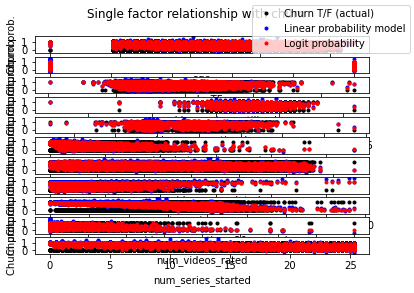

In [91]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 11
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

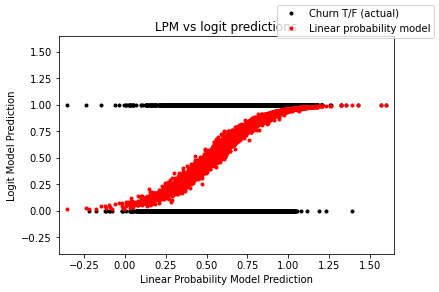

In [92]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [93]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

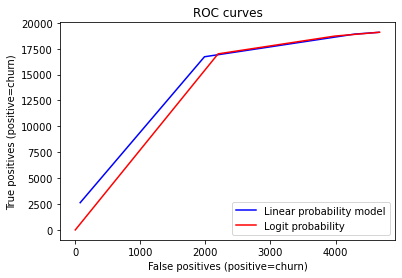

In [94]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [125]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 4.5141
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [126]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [127]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [128]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

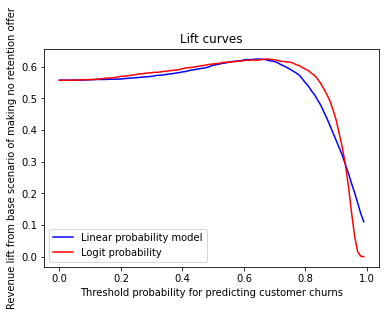

In [129]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [130]:
lmp_offer_max = df_lift_threshold['lpm_offer'].max()
lmp_offer_max

0.6243532178747055

In [131]:
logit_offer_max = df_lift_threshold['logit_offer'].max()
logit_offer_max

0.6245456489202474

In [132]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_threshold['threshold'][i])

0.65


In [133]:
for i in range(df_lift_threshold.shape[0]):
    if df_lift_threshold['logit_offer'][i] == logit_offer_max:
        print(df_lift_threshold['threshold'][i])

0.68


In [134]:
threshold = 0.665

In [135]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

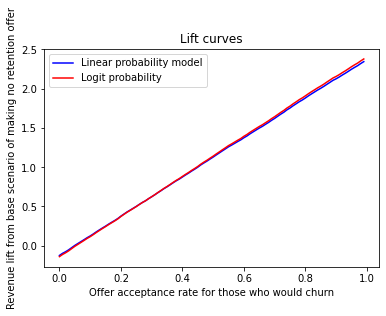

In [136]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [137]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acceptance_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)
    
    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

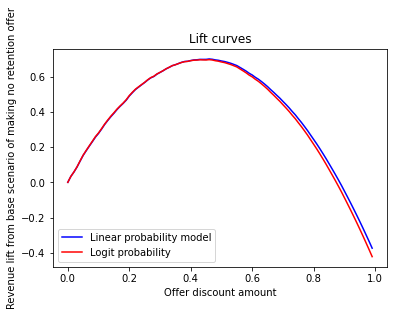

In [138]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [139]:
lmp_offer_max = df_lift_discount_amount['lpm_offer'].max()
lmp_offer_max

0.6995552704725245

In [140]:
logit_offer_max = df_lift_discount_amount['logit_offer'].max()
logit_offer_max

0.6956382296343804

In [141]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['lpm_offer'][i] == lmp_offer_max:
        print(df_lift_discount_amount['discount_amount'][i])

0.46


In [142]:
for i in range(df_lift_discount_amount.shape[0]):
    if df_lift_discount_amount['logit_offer'][i] == logit_offer_max:
        print(df_lift_discount_amount['discount_amount'][i])

0.46
